# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

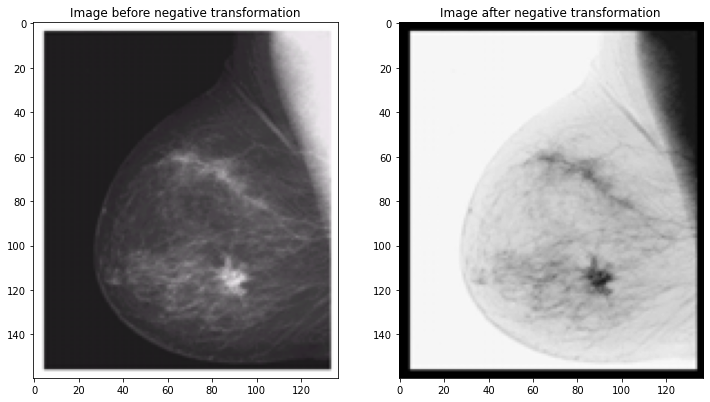

In [4]:
'''
1
Negative Transformation
'''
# Define function ‘Negative’ that apply Negative transformation for any image 
# and any threshold. What is the equation???
def Negative(image1,L):
    image=rgb2gray(image1)
    return (L-1) - image 

# def Negative(image1):
#     image=rgb2gray(image1)
#     return 1 - image 
 
#Read image ‘Picture1.png’
image = io.imread('imgs\picture1.png')[:,:,:3]


# Call the function and apply it on the image ‘Picture1.png’
negative_image=Negative(image,256)
# negative_image=Negative(image)

# Display the image before and after transformation in the same figure.
show_images([image,negative_image],['Image before negative transformation','Image after negative transformation']) 



[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]
 ...
 [0.99607843 0.99607843 1.         ... 0.65601804 1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.91260941 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 1.         0.99607843 0.99607843]]
//////////////////////////////////////////
[[51.49411765 51.49411765 51.49411765 ... 51.49411765 51.49411765
  51.49411765]
 [51.49411765 51.49411765 51.49411765 ... 51.49411765 51.49411765
  51.49411765]
 [51.49411765 51.49411765 51.49411765 ... 51.5        51.49411765
  51.49411765]
 ...
 [51.49411765 51.49411765 51.5        ... 50.98402706 51.5
  51.5       ]
 [51.49411765 51.49411765 51.49411765 ... 51.36891412 51.49411765
  51.49411765]
 [51.49411765 51.49411765 51.49411765 ... 51.5        51.49411765
  51.49411765]]


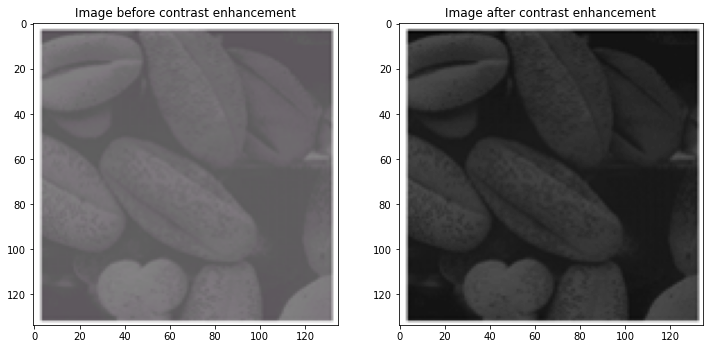

In [24]:
'''
2
Contrast Enhancement
'''

# Define function ‘Contrast_enhancement’ that Stretches the grey levels in the 
# range 0 to 100 into the range 50 – 200 and leaves other levels non changed. 
# What is the equation??? 
# hint: draw the spectrum of levels to know the equation, use for loops and if 
# statements(or matrix conditional indexing which is faster but a little tricky) in 
# the implementation.

# (r1,s1)=>(0,50) 
# (r2,s2)=>(100,200) 
# y=ax+b, slope=(y2-y1)/(x2-x1)=(200-50)/(100-0)=1.5,b=y when x=0 b=50
# y=1.5x+50

# np.where(condition,x,y)
# if condition is true, take x 
# else take y

from numpy import float16, int32


def Contrast_enhancement(image1):
    image=rgb2gray(image1)
    # image.astype(float16)
    print(image)
    image =  np.where(image<=100,1.5*image+50,image)
    print('//////////////////////////////////////////')
    print(image)
    return image


# Read image ‘Picture2.png’
image = io.imread('imgs\picture2.png')[:,:,:3]

#Call the function and apply it on the image ‘Picture2.png’
stretched_image=Contrast_enhancement(image)

#Display the image before and after transformation in the same figure.
show_images([image,stretched_image],['Image before contrast enhancement','Image after contrast enhancement']) 


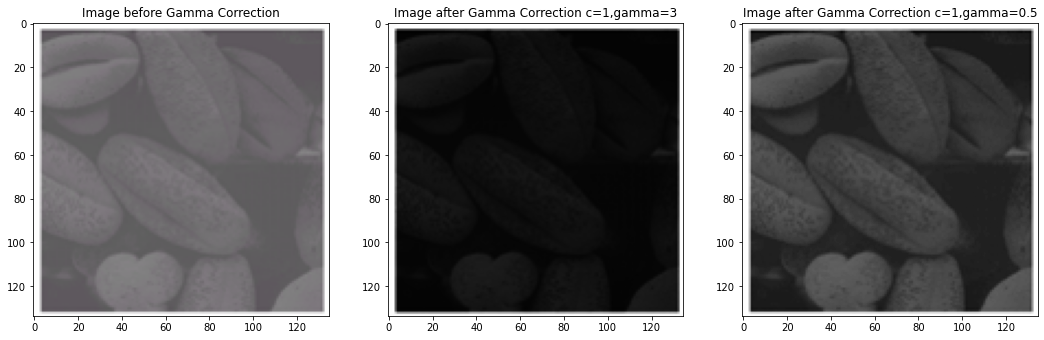

In [6]:
'''
3
Gamma Correction
'''
# Define function ‘Gamma_Correction’ that Stretches the grey levels according 
# to the gamma equation. (𝐴′ = 𝑐 ∗ 𝐴^𝛾) .
def Gamma_Correction(image1, c, gamma):
    image=rgb2gray(image1)
    image=c*(image**gamma)
    return image



#Read image ‘Picture2.png’
image = io.imread('imgs\picture2.png')[:,:,:3]

# Call the function with 𝑐=1 and 𝛾 = 3 and 𝑐=1 and 𝛾 = 0.5
image1=Gamma_Correction(image,1,3)
image2=Gamma_Correction(image,1,0.5)
# Display the images before and after transformation in the same figure.
show_images([image,image1,image2],['Image before Gamma Correction','Image after Gamma Correction c=1,gamma=3','Image after Gamma Correction c=1,gamma=0.5'])
# What is the effect of decreasing 𝛾 ?
# A [0:1] 
# when gamma<1 decreasing of gamma will increase A' -> brighter
# when gamma>1 increasing of gamma will decrease A' -> darker


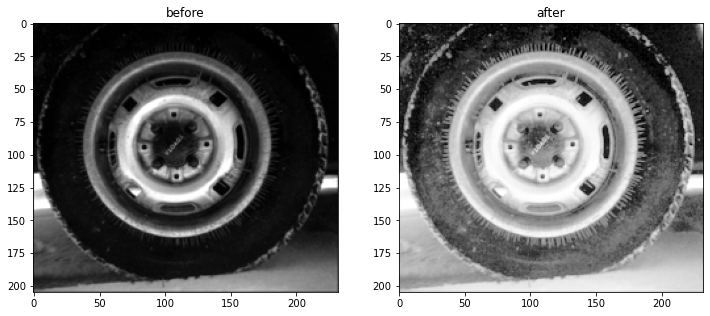

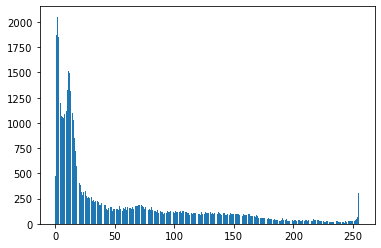

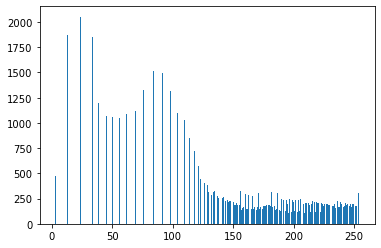

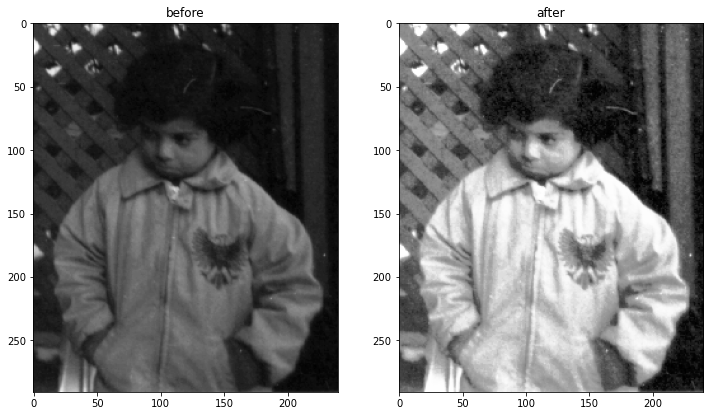

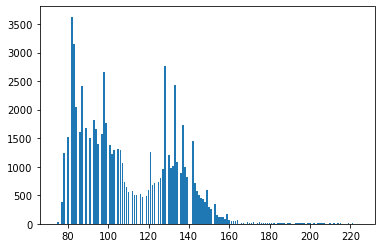

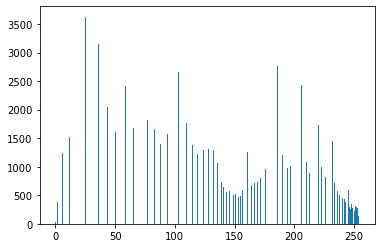

In [7]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
from skimage.exposure import histogram 
from matplotlib.pyplot import bar

def getImageWithHist(name,ext,nbins=256):
    pass

def showHist(img):
    # An "interface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)
    bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align='center')

    
# def Histogram_Equalization(grey_image,G=256):
# #     print (image)
# #     grey_image=rgb2gray(image)
# #     print (grey_image) 

#     N, M = grey_image.shape
# #     print(grey_image.shape)
#     H=np.zeros(G)
#     H = histogram(grey_image,nbins=G)
    
#     print(H[0])
    
#     cdf = np.cumsum(H[0])
#     print(cdf)
    
#     mapping=np.zeros(G)
#     mapping = np.round(((G-1) * cdf)//(N*M))
#     print(mapping)
    
# #     temp_array=np.array(range(0,256))
# #     print(temp_array)
    
    
#     grey_image2=np.zeros((N,M))  
#     for i in range(G):
# #         grey_image2[grey_image==temp_array[i]]=mapping[i]
#         grey_image2[grey_image==i]=mapping[i]
# #     print(grey_image2)
#     return grey_image2


def Histogram_Equalization(image,G=256):
    
    image_copy = np.copy(image)
    N,M=image.shape
    image_copy = image_copy.flatten()
    
    
#     histogram = np.zeros(G)
#     for i in image_copy:
#         histogram[int(i)] += 1

    H = np.zeros(G)
    H,nbins = histogram(image_copy,nbins=G)
    H_new=np.zeros(G)
    a=nbins[0]
    b=nbins[len(H)-1]+1
    H_new[a:b] = H

    H_c = np.cumsum(H_new)
    
    image_copy = image_copy.astype(np.uint8)
    image_copy = np.round((G-1) * H_c[image_copy] / (N*M))
    
    image_copy = image_copy.reshape(N,M)
    
#     print(image_copy)
    return image_copy

def perform_Histogram_Equalization(image_path):
    image = io.imread(image_path)
    image_eq=Histogram_Equalization(image)
    show_images([image,image_eq], ['before','after'])
    showHist(image)
    showHist(image_eq)


# image = io.imread('imgs/tire.tif')
# image_eq=Histogram_Equalization(image)
# show_images([image,image_eq], ['before','after'])
# showHist(image)
# showHist(image_eq)

# image2 = io.imread('imgs/pout.tif')
# image_eq2=Histogram_Equalization(image2)
# show_images([image2,image_eq2], ['before','after'])
# showHist(image2)
# showHist(image_eq2)

perform_Histogram_Equalization('imgs/tire.tif')
perform_Histogram_Equalization('imgs/pout.tif')

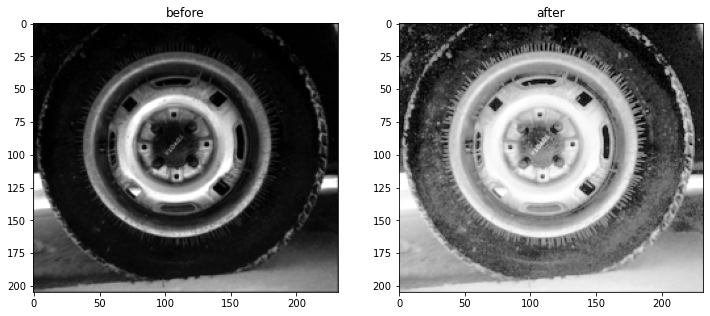

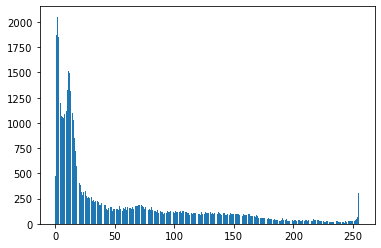

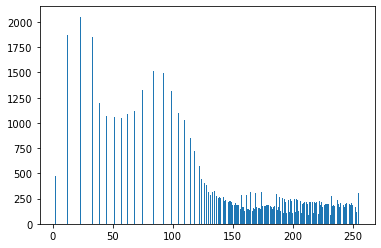

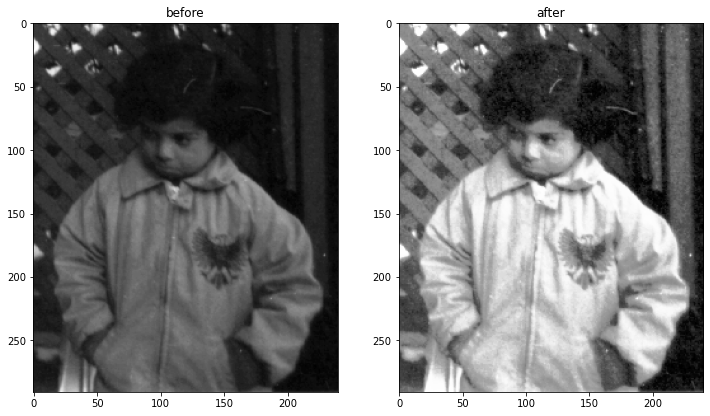

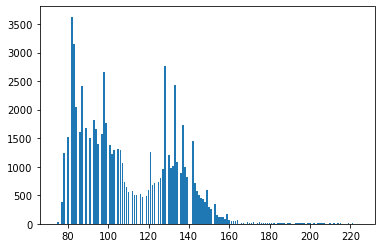

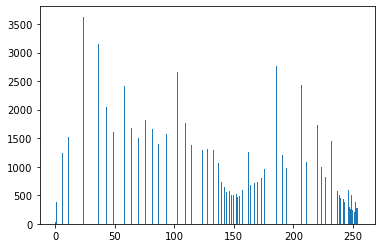

In [8]:
from skimage.exposure import equalize_hist

def test_Histogram_Equalization(image_path):
    image = io.imread(image_path)
    image=image.astype(np.uint8)
    image_eq=equalize_hist(image)
    image_eq=(image_eq*255).astype(np.uint8)
    show_images([image,image_eq], ['before','after'])
    showHist(image)
    showHist(image_eq)
    
# image_tire = io.imread('imgs/tire.tif')
# image_tire_eq = equalize_hist(image, 256)
# show_images([image_tire,image_tire_eq], ['before','after'])
# showHist(image_tire)
# showHist(image_tire_eq*255)

# image_pout = io.imread('imgs/pout.tif')
# # print(image)
# image_pout_eq = equalize_hist(image_pout, 256)
# # print(image1)
# show_images([image_pout,image_pout_eq], ['before','after'])
# showHist(image_pout)
# showHist(image_pout_eq*255)
    
test_Histogram_Equalization('imgs/tire.tif')
test_Histogram_Equalization('imgs/pout.tif')

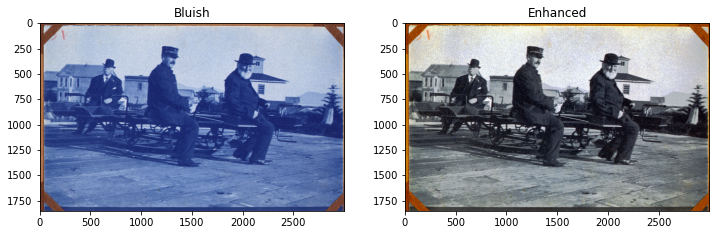

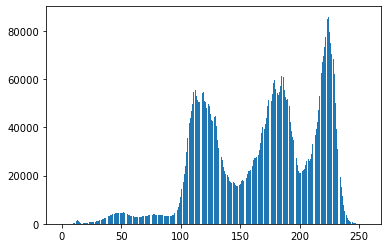

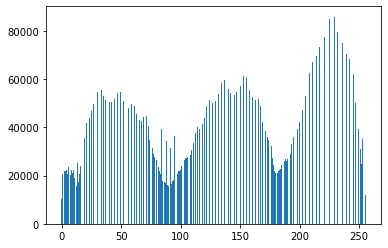

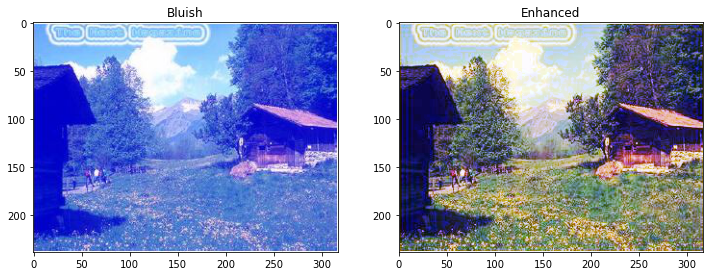

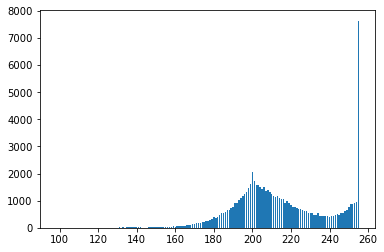

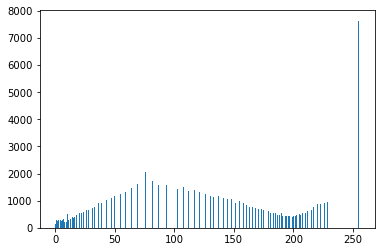

In [16]:
'''
bluish
'''
def eliminate_bluish(img):
    enhanced=np.copy(img)
    enhanced[:, :, 2] = Histogram_Equalization(enhanced[:, :, 2])
    # enhanced[:, :, 1] = Histogram_Equalization(enhanced[:, :, 1])
    # enhanced[:, :, 0] = Histogram_Equalization(enhanced[:, :, 0])
    return enhanced

def test_eliminate_bluish(img_path):
  Bluish=io.imread(img_path)
  Enhanced=eliminate_bluish(Bluish)
  show_images([Bluish, Enhanced], ['Bluish', 'Enhanced'])
  showHist(Bluish[:,:,2])
  showHist(Enhanced[:,:,2])


test_eliminate_bluish('1.jpg')
test_eliminate_bluish('2.jpg')